In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\Mutual-Funds-India-Historical-NAV-Report.csv")
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:,1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=9)


In [43]:
x

array([['10-07-2024'],
       ['09-07-2024'],
       ['08-07-2024'],
       ...,
       ['13-08-2014'],
       ['12-08-2014'],
       ['11-08-2014']], dtype=object)

In [45]:
y

0       250.4880
1       252.1362
2       250.4565
3       251.1779
4       249.6424
          ...   
2432     37.4482
2433     37.1531
2434     36.9001
2435     37.0239
2436     36.9249
Name: NAV (Rs), Length: 2437, dtype: float64

In [47]:
df.head()

,NAV Date,NAV (Rs)
0,10-07-2024,250.4880
1,09-07-2024,252.1362
2,08-07-2024,250.4565
3,05-07-2024,251.1779
4,04-07-2024,249.6424


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAV Date  2437 non-null   object 
 1   NAV (Rs)  2437 non-null   float64
dtypes: float64(1), object(1)
memory usage: 38.2+ KB


In [8]:
df.describe()

,NAV (Rs)
count,2437.000000
mean,82.264970
std,48.784294
min,36.900100
25%,46.755700
50%,56.379600
75%,117.042300
max,252.136200


In [10]:
x_train

array([['09-06-2023'],
       ['01-02-2021'],
       ['11-07-2022'],
       ...,
       ['24-06-2022'],
       ['06-02-2023'],
       ['19-12-2022']], dtype=object)

In [12]:
y_train

array([137.4328,  77.153 , 117.8564, ..., 111.82  , 130.3876, 140.9535])

In [14]:
len(x_train)

1624

In [22]:
len(x_test)

813

In [24]:
date_column = 'NAV Date'  
price_column = 'NAV (Rs)'  


dataset[date_column] = pd.to_datetime(dataset[date_column], format='%d-%m-%Y')  


dataset['date_float'] = dataset[date_column].apply(lambda x: x.timestamp())


X = dataset[['date_float']]
y = dataset[price_column]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=9)

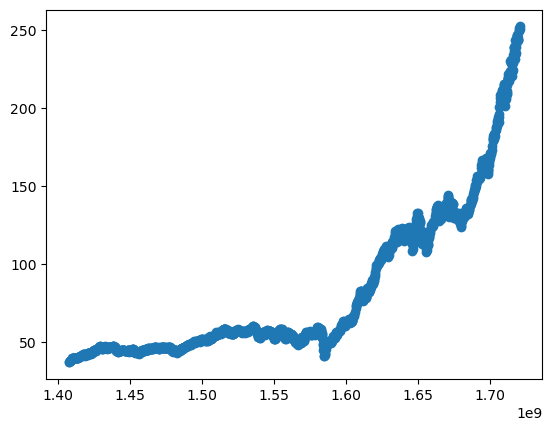

In [26]:
plt.scatter(x_train,y_train)

In [32]:
y_test

1964     45.6606
1505     56.5778
2345     41.8410
680     114.8323
1445     59.5936
          ...   
1211     49.7644
2274     46.5520
441     136.4695
937      64.0525
281     132.1189
Name: NAV (Rs), Length: 813, dtype: float64

In [92]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[ 45.828164  56.700382  41.742899 115.617638  59.643927  50.47472
  43.075271  53.631746  42.035328 134.14101   44.624009  99.021197
  39.519048  42.779828  47.561724 123.948208 110.263563 136.317816
  45.907071  44.248088  49.04032   57.644396 130.6894   119.973964
 192.191602 224.711878  54.864138 122.000209  57.725774  51.723008
 119.041526  46.458069 126.980726  54.780153 158.444814 242.290553
  54.032327  58.277784  55.790347  56.393172  54.215446  56.176595
  79.044764  54.175645  44.160276  41.591368  45.978631  59.437312
  63.516517  55.604756 166.860594  42.23756   53.073798 155.032822
 162.840422 190.101028  51.901447  60.048037  45.867291  40.882266
  51.341395  56.958505  55.074491  49.438558 141.046061  50.752548
 107.743993  54.696615  45.482971 180.658615 124.611204  57.400253
 152.94245  239.677281  47.9334    52.996414  40.236195  57.532817
  45.439107 105.346866  69.932761  50.271819  53.367497  59.202373
 170.351687  56.054747 152.976923  58.518771  78.72447   50.351

In [69]:
def predict_stock_price(future_date):
    future_date = pd.to_datetime(future_date, format='%d-%m-%Y')  # Adjust the format as needed
    future_date_float = future_date.timestamp()
    future_date_df = pd.DataFrame({'date_float': [future_date_float]})
    predicted_price = model.predict(future_date_df)
    return predicted_price[0]
future_date='23-04-2029'
predicted_value=predict_stock_price(future_date)
print(predicted_value)

250.9241020000002
